In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\ss987\\OneDrive\\Desktop\\Data\\Electric_Vehicle_Population_Data.csv")

In [122]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [4]:
df.shape

(235692, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235692.000000,235656.000000,235656.000000,235198.000000,2.356920e+05,2.356890e+05
mean,98177.656463,2021.406658,46.262569,787.268328,28.879519,2.353127e+08,5.298066e+10
std,2524.218661,2.991908,84.045829,7177.668305,14.904644,6.799098e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [7]:
jf=df.copy()

In [8]:
for col in jf.columns:
    if jf[col].dtype == "object":
        jf[col] = jf[col].fillna(jf[col].mode()[0])
    else:
        jf[col] = jf[col].fillna(jf[col].mean())

In [9]:
jf.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [10]:
numeric_features = [features for features in jf.columns if jf[features].dtype !="O" ]
categorical_features = [features for features in jf.columns if jf[features].dtype =="O"]

print ("We have{} numerical features : {}".format (len(numeric_features), numeric_features))
print ("\nWe have{} categorical features : {}".format (len(categorical_features), categorical_features))

We have7 numerical features : ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

We have10 categorical features : ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


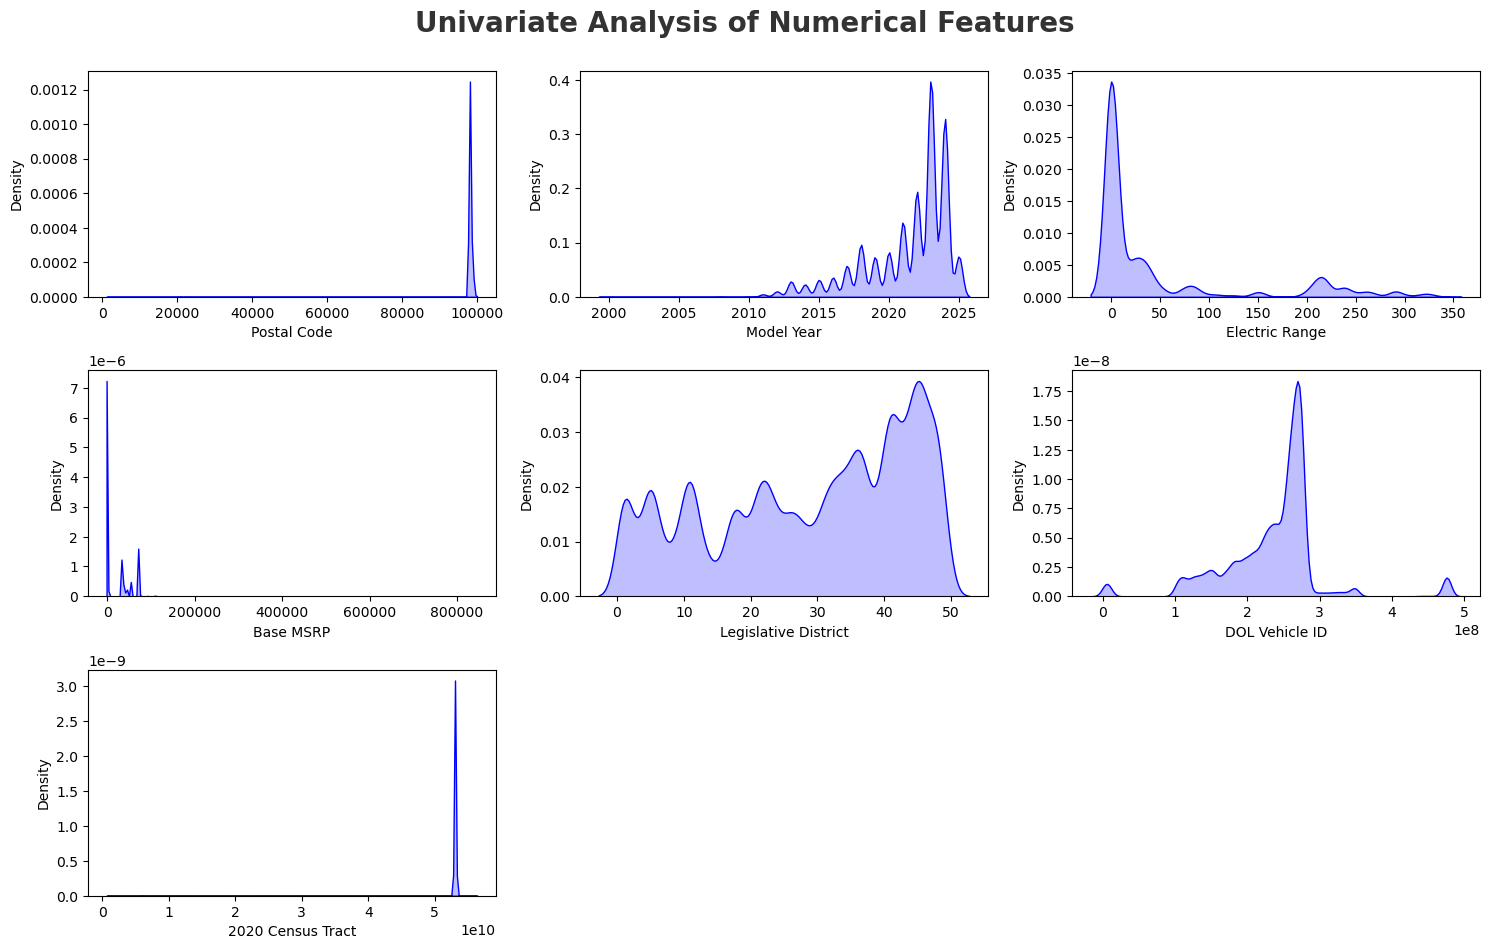

In [80]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=jf[numeric_features[i]],fill=True,color="b")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: ylabel='count'>

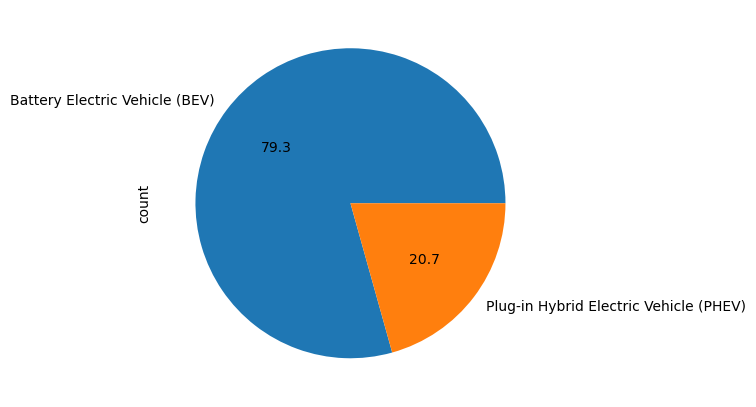

In [12]:
jf["Electric Vehicle Type"].value_counts().plot.pie(y=jf["Electric Vehicle Type"],figsize=(5,10),autopct="%1.1f")

C:\Users\ss987\AppData\Local\Temp\ipykernel_2008\3584763918.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Make', y='Count', data=top_makes.head(10), palette='hls')


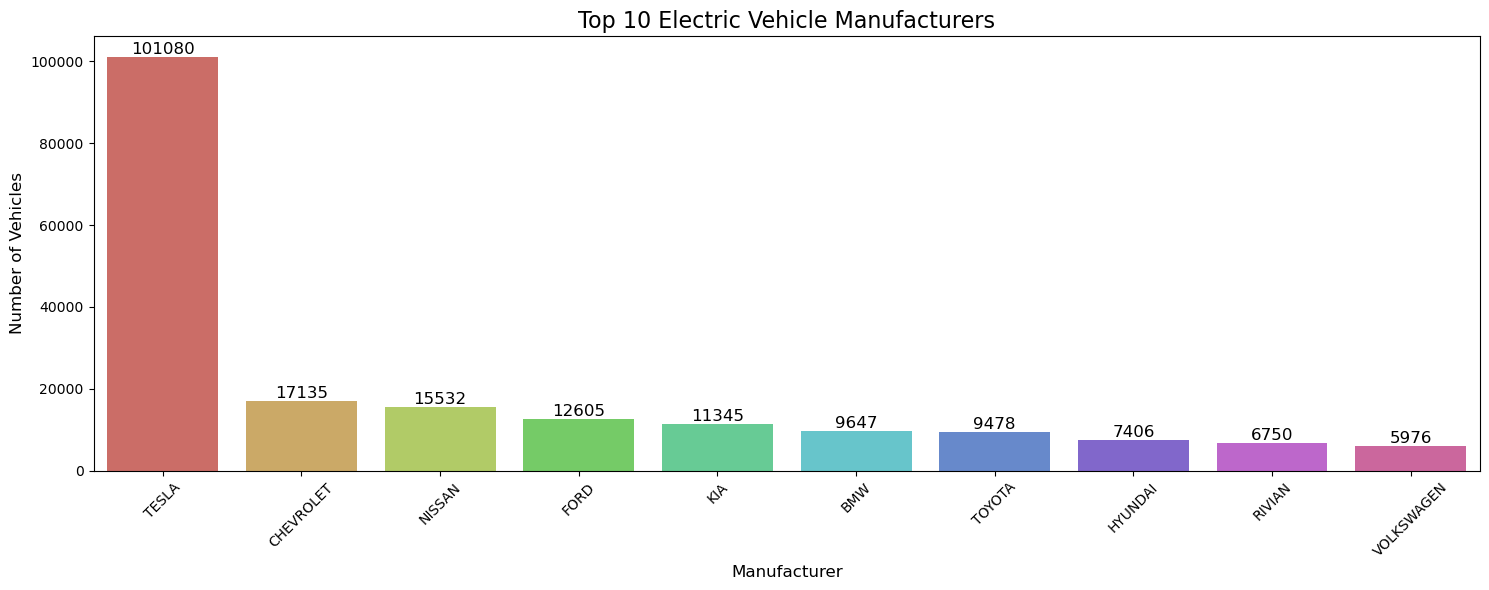

In [98]:
# Step 1: Create the grouped data
top_makes = jf['Make'].value_counts().reset_index()
top_makes.columns = ['Make', 'Count']

# Step 2: Plot
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Make', y='Count', data=top_makes.head(10), palette='hls')
plt.title("Top 10 Electric Vehicle Manufacturers", fontsize=16)
plt.xlabel("Manufacturer", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.xticks(rotation=45)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.tight_layout()
plt.show()

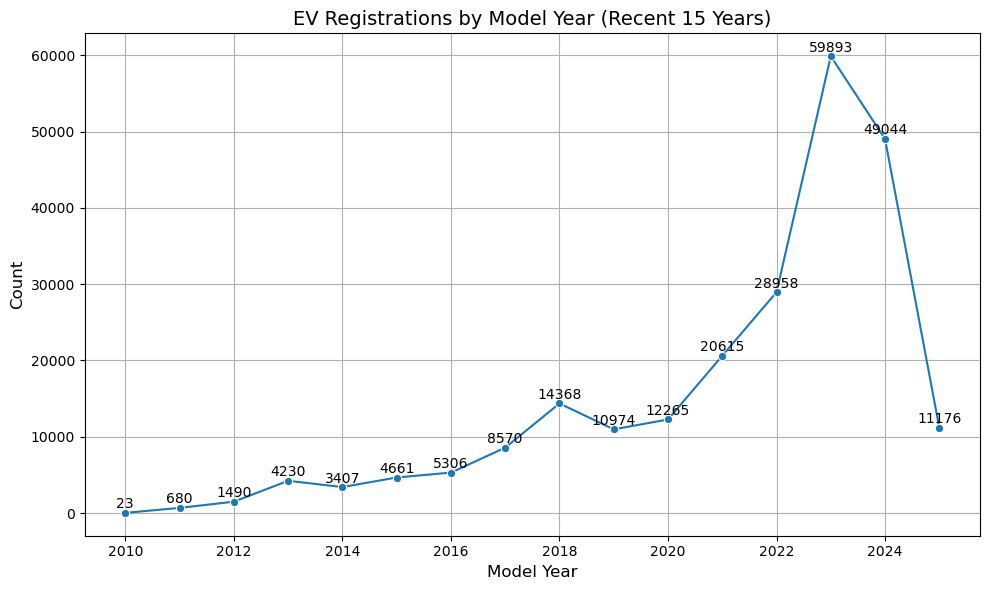

In [14]:
# 3. Count of EVs per Model Year (last 15 years)
recent_years = jf[jf['Model Year'] >= (jf['Model Year'].max() - 15)]
yearly_counts = recent_years['Model Year'].value_counts().sort_index()

# Chart 3: Vehicles by Model Year
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("EV Registrations by Model Year (Recent 15 Years)", fontsize=14)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
# Add labels to each data point
for x, y in zip(yearly_counts.index, yearly_counts.values):
    ax.text(x, y + max(yearly_counts.values) * 0.01, str(y), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\ss987\AppData\Local\Temp\ipykernel_2008\4031093290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_cities.index, x=top_cities.values, palette="coolwarm")


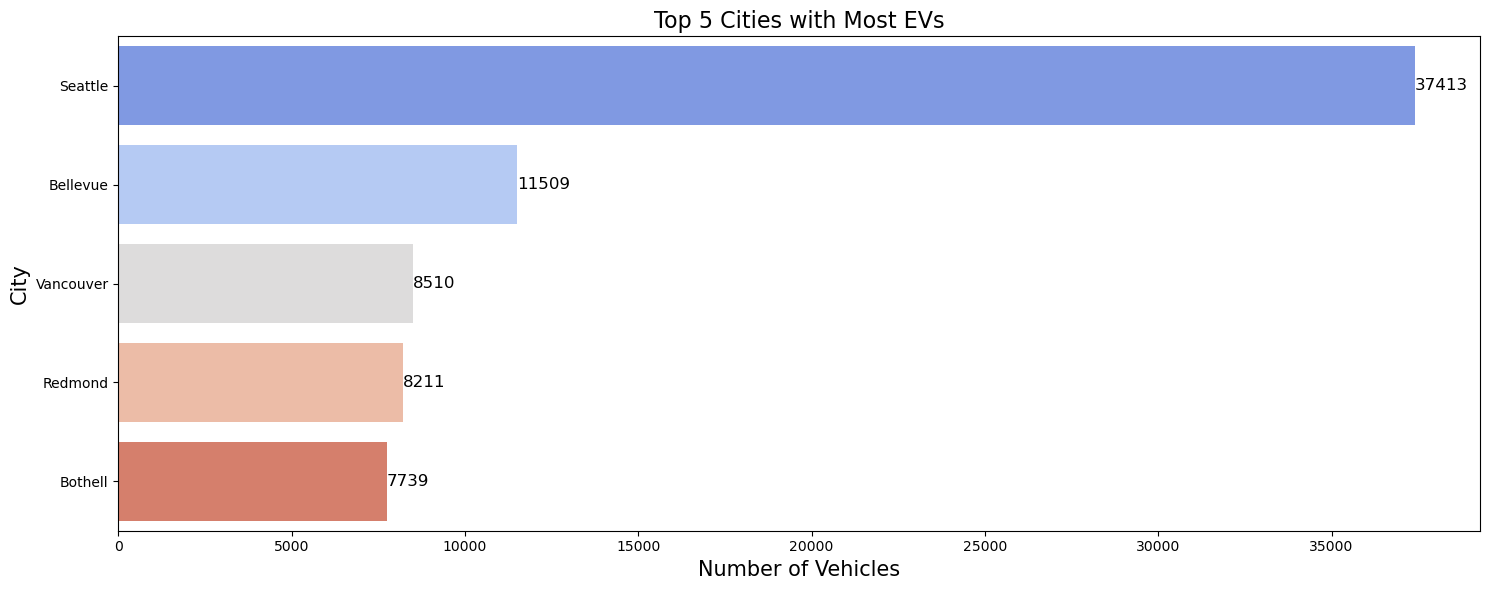

In [118]:
top_cities = jf['City'].value_counts().head(5)

plt.figure(figsize=(15,6))
ax = sns.barplot(y=top_cities.index, x=top_cities.values, palette="coolwarm")
plt.title("Top 5 Cities with Most EVs", fontsize=16)
plt.xlabel("Number of Vehicles", fontsize=15)
plt.ylabel("City", fontsize=15)

for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.tight_layout()
plt.show()

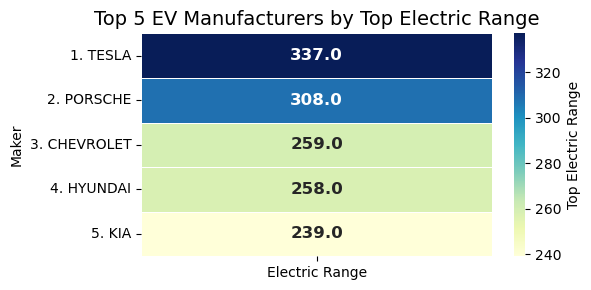

In [84]:
# Create Top 5 EV manufacturers based on max electric range
pivot_top5 = (
    jf.groupby('Make')['Electric Range']
    .max()
    .sort_values(ascending=False)
    .head(5)
    .to_frame()
)

# Add rank numbers to the index
pivot_top5.index = [f"{i+1}. {make}" for i, make in enumerate(pivot_top5.index)]

# Plot the heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(
    pivot_top5,
    annot=True,
    annot_kws={'size': 12, 'weight': 'bold'},
    cmap='YlGnBu',
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Top Electric Range'}
)

plt.title("Top 5 EV Manufacturers by Top Electric Range", fontsize=14)
plt.xlabel("")
plt.ylabel("Maker")
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()
